# Task 1.1

?? Why not use l2 norm???
Search up when and when not to use l2 norm i guess?

In [1]:
import numpy as np
from scipy import stats


TC = np.zeros((240, 6))
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration = [15,20,25,15,20,25]

for j in range(0, 6):
    flag = 1
    on_count = 0
    for i in range(AV[j],240):
        TC[i,j] = flag
        #print(i, j, on_count, flag)
        if (flag):
            on_count+=1
        if (on_count==duration[j]):
            on_count = 0
            flag = 0
        if ((i-AV[j]+1)%IV[j] ==0):
            flag= 1

# for i in range(0, 6):
#     print(np.linalg.norm(TC[:,i]))

TC = stats.zscore(TC)

np.savetxt("data/TC.csv", TC, delimiter=',', header='1,2,3,4,5,6')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(TC)
df.head()
df.columns
for i in range(0,6):
    plot = sns.lineplot(x=df.index, y=df[i])
    plt.title(f'TC {i+1}')
    plt.xlabel('Time step')
    plt.ylabel('')
    # plt.figure()
    plt.savefig(f'./plots/TC{i+1}')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# TASK 1.2

[[ 1.00000000e+00  6.47630098e-18  1.69030851e-01  8.60662966e-02
   0.00000000e+00  8.60662966e-02]
 [ 6.47630098e-18  1.00000000e+00 -2.85714286e-02  1.30930734e-01
  -2.31296463e-17 -1.30930734e-01]
 [ 1.69030851e-01 -2.85714286e-02  1.00000000e+00  4.36435780e-02
  -5.08852220e-17  1.30930734e-01]
 [ 8.60662966e-02  1.30930734e-01  4.36435780e-02  1.00000000e+00
   7.74596669e-01  6.00000000e-01]
 [ 0.00000000e+00 -2.31296463e-17 -5.08852220e-17  7.74596669e-01
   1.00000000e+00  7.74596669e-01]
 [ 8.60662966e-02 -1.30930734e-01  1.30930734e-01  6.00000000e-01
   7.74596669e-01  1.00000000e+00]]


Text(0.5, 1.0, 'TC Correlation matrix')

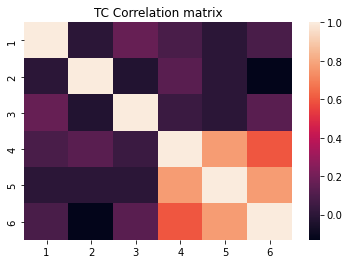

In [3]:
df = df.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})
correlations = np.corrcoef(df, rowvar=False)
# print(correlations)
print(correlations)
labels = [1,2,3,4,5,6]
sns.heatmap(correlations, xticklabels=labels, yticklabels=labels)
plt.title("TC Correlation matrix")

# Task 1.3

In [4]:
vert_slices = {0: [2, 6], 1: [2, 6], 2:[8,13], 3:[8,13], 4:[15,19], 5:[15,19]}
hor_slices = {0: [2, 6], 1: [15, 19], 2:[2,6], 3:[15,19], 4:[2,6], 5:[15,19]}

tmpSM = []

for j in range(0,6):
    tmpA = np.zeros((21,21))
    vert = [index-1 for index in vert_slices[j]]
    hor = [index-1 for index in hor_slices[j]]

    tmpA[vert[0]:vert[1], hor[0]:hor[1]] = 1
    tmpSM.append(tmpA.flatten())
    sns.heatmap(tmpA, yticklabels=range(1,22), xticklabels=range(1,22))
    plt.title(f'SM {j+1}')
    plt.savefig(f'./plots/SM{j+1}')
    plt.clf()

tmpSM = np.asarray(tmpSM)

<Figure size 432x288 with 0 Axes>

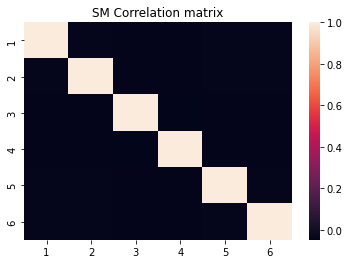

<Figure size 432x288 with 0 Axes>

In [5]:
df = np.matrix.transpose(tmpSM)
df = pd.DataFrame(df)
correlations = df.corr()

correlations
labels = range(1,7)
sns.heatmap(correlations, xticklabels=labels, yticklabels=labels)

plt.title("SM Correlation matrix")
plt.savefig(f'./plots/SM Correlation Matrix')
plt.figure()
plt.clf()


# Task 1.4
Using a 6 × 6 CM for each noise type (spatial and temporal) can you show if they
are correlated across sources?

(6, 6)
(6, 6)


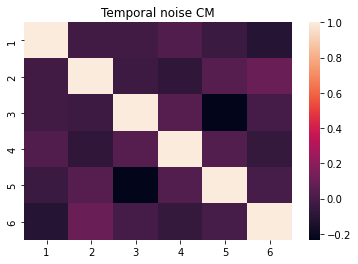

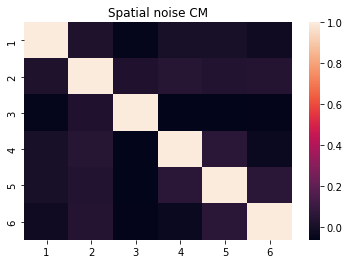

<Figure size 432x288 with 0 Axes>

In [61]:
TC_noise = np.random.normal(scale=np.sqrt(0.25), size=(240, 6))
SM_noise = np.random.normal(scale=np.sqrt(0.015) ,size=(6, 441))

TC_noise_corr = np.corrcoef(TC_noise, rowvar=False)
SM_noise_corr = np.corrcoef(SM_noise)

sns.heatmap(TC_noise_corr, yticklabels=range(1,7), xticklabels=range(1,7))
plt.title('Temporal noise CM')
plt.savefig(f'./plots/Temporal noise CM')
plt.figure()
plt.clf()

sns.heatmap(SM_noise_corr, yticklabels=range(1,7), xticklabels=range(1,7))
plt.title('Spatial noise CM')
plt.savefig(f'./plots/Spatial noise CM')
plt.figure()
plt.clf()


print(TC_noise_corr.shape)
print(SM_noise_corr.shape)

Also plot the histogram of both noise sources to see if
they have a normal distribution?

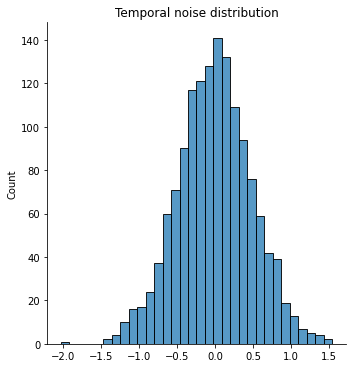

<Figure size 432x288 with 0 Axes>

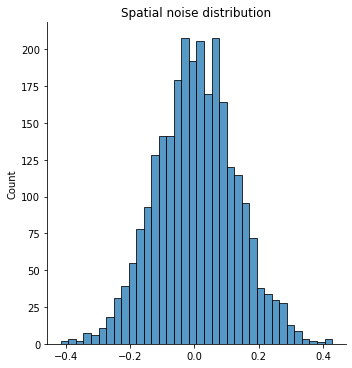

<Figure size 432x288 with 0 Axes>

In [62]:
TC_noise_flat = TC_noise.flatten()
SM_noise_flat = SM_noise.flatten()
sns.displot(TC_noise_flat)
plt.title('Temporal noise distribution')
plt.savefig('plots/Temporal noise distribution')
plt.figure()
plt.clf()
sns.displot(SM_noise_flat)
plt.title('Spatial noise distribution')
plt.savefig('plots/Spatial noise distribution')
plt.figure()
plt.clf()

Does this normal distribution fulfils the mean and
variance= 1.96σ criteria relating to 0.25, 0.015, and zero mean? Is there product ΓtΓs
correlated across V number of variables

WHAT MEAN BBY VARIANCE=1.96????

Spatial noise mean: 0.0049994852648126325
Spatial noise variance: 0.01540544350781708
Temporal noise mean: -0.007164135383739585
Temporal noise variance: 0.2374222270704983
0.9550294380353027


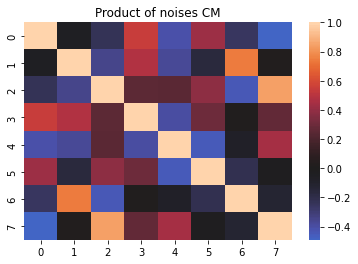

<Figure size 432x288 with 0 Axes>

In [63]:
print('Spatial noise mean:', np.mean(SM_noise_flat))
print('Spatial noise variance:',np.var(SM_noise_flat))
print('Temporal noise mean:',np.mean(TC_noise_flat))
print('Temporal noise variance:', np.var(TC_noise_flat))

print(1.96*np.std(TC_noise_flat))

product = np.matmul(TC_noise,SM_noise)
product = product[:,0:8]
product_corr = np.corrcoef(product, rowvar=False)
sns.heatmap(product_corr, center=0)
plt.title('Product of noises CM')
plt.savefig('plots/Product of noises CM')
plt.figure()
plt.clf()


# Task 1.5

Generate a synthetic dataset X of size 240 × 441 as X = (TC + Γt) × (SM+ Γs). This
builds a dataset that follows the model shown in eq (1). Can these products TC × Γs
and Γt × SM exist, If yes what happened to them because if we keep them then we
cannot fit our model onto (1)? Plot atleast 100 randomly selected time-series from X
as few of them are shown in Figure 2 (left). Also plot variance of all 441 variables on
a separate plot. What information does this plot give you? At the end standardize the
dataset X, because source TCs (regressors) are also standardized and so dataset should
be too.

FileNotFoundError: [Errno 2] No such file or directory: '/plots/TimeSeries of random sampels.png'

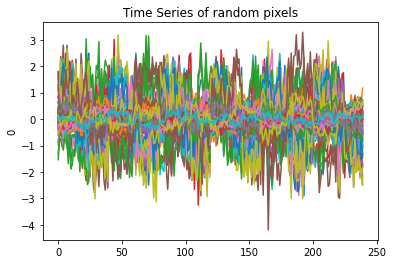

In [98]:
D = np.add(TC, TC_noise)
A = np.add(tmpSM, SM_noise)

X = np.matmul(D,A)

num_samples = 100
space_choices = np.random.choice(range(0,441), size=num_samples, replace=False)
sample = X[:, space_choices]


df = pd.DataFrame(sample)
df.head()
df.columns
for j in range(0,num_samples):
    plot = sns.lineplot(x=df.index, y=df[j])
plt.title("Time Series of random pixels")
plt.savefig('/plots/TimeSeries of random sampels')
plt.figure()
plt.clf()



In [75]:
np.random.choice(range(0,441), size=100, replace=False)

array([301, 280, 223, 221, 435, 113,  95,  20, 313, 335, 383, 262,  55,
       245, 241,   0, 378,  63, 110, 234, 332, 246,  56, 214,  52, 192,
       123, 149,   5, 276, 217, 207, 210, 366, 347, 182, 251, 213, 348,
         7, 417, 362, 133, 103,  94, 309,  69, 326, 354, 225, 433, 198,
        80, 111,  76, 402, 315, 216, 352,  29, 369, 300, 131, 407, 124,
        78, 227, 233, 373, 141, 381, 215,  25, 418, 259,  46, 430,  67,
       190, 371, 370, 304, 212, 281, 342, 296, 137, 426, 290, 391, 353,
       310, 107, 203,  27, 195,   8,  81, 330, 428])